In [1]:
# importing all the neccessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import emoji
from IPython.core.interactiveshell import InteractiveShell
import re

# how many outputs do you want to display for each block ?
InteractiveShell.ast_node_interactivity = 'all'
# InteractiveShell.ast_node_interactivity = 'last'



In [2]:
#how many output summary row do you want to display?
pd.set_option('display.max_row',None)
# pd.set_option('display.max_row',100)

# how many output summary columns do you want to display?
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_columns',20)


In [3]:
bscs = pd.read_csv("C:\\Users\\Waqas\\OneDrive\\Dataset\\WhatsApp Chat with BSCS.csv",
                     delimiter = '\t',
                     header = None,
                     names =['text'])

In [4]:
bscs.head(10)

,text
0,"11/07/2020, 10:43 pm - Messages and calls are ..."
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ..."
2,"16/07/2020, 2:39 pm - You added Senior ubit"
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar..."
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ..."
5,"24/07/2020, 1:04 am - Ammar Sohail UBIT: Depar..."
6,"24/07/2020, 1:04 am - Manav Lala UBIT: DCS-UBIT"
7,"24/07/2020, 1:07 am - Ammar Sohail UBIT: San Q"
8,"24/07/2020, 12:50 pm - Shaban Alam UBIT: <Medi..."
9,"24/07/2020, 12:52 pm - Sheik Raess UBIT: 👍👍👍"


In [5]:
# Extract DateTime
bscs[['DataTime_Str','text_2']]  = bscs['text'].str.split(" - ",1,expand=True)

In [6]:
bscs.head(10)

,text,DataTime_Str,text_2
0,"11/07/2020, 10:43 pm - Messages and calls are ...","11/07/2020, 10:43 pm",Messages and calls are end-to-end encrypted. N...
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ...","15/07/2020, 8:51 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>
2,"16/07/2020, 2:39 pm - You added Senior ubit","16/07/2020, 2:39 pm",You added Senior ubit
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar...","23/07/2020, 5:38 pm",IAMWaqasAhmed: Allow kardoo sub
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ...","23/07/2020, 7:53 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>
5,"24/07/2020, 1:04 am - Ammar Sohail UBIT: Depar...","24/07/2020, 1:04 am",Ammar Sohail UBIT: Department name? Computer s...
6,"24/07/2020, 1:04 am - Manav Lala UBIT: DCS-UBIT","24/07/2020, 1:04 am",Manav Lala UBIT: DCS-UBIT
7,"24/07/2020, 1:07 am - Ammar Sohail UBIT: San Q","24/07/2020, 1:07 am",Ammar Sohail UBIT: San Q
8,"24/07/2020, 12:50 pm - Shaban Alam UBIT: <Medi...","24/07/2020, 12:50 pm",Shaban Alam UBIT: <Media omitted>
9,"24/07/2020, 12:52 pm - Sheik Raess UBIT: 👍👍👍","24/07/2020, 12:52 pm",Sheik Raess UBIT: 👍👍👍


In [7]:
bscs['DateTime'] = pd.to_datetime(bscs['DataTime_Str'],format = "%d/%m/%Y, %I:%M %p",errors='coerce')

In [8]:
bscs.head()

,text,DataTime_Str,text_2,DateTime
0,"11/07/2020, 10:43 pm - Messages and calls are ...","11/07/2020, 10:43 pm",Messages and calls are end-to-end encrypted. N...,2020-07-11 22:43:00
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ...","15/07/2020, 8:51 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-15 20:51:00
2,"16/07/2020, 2:39 pm - You added Senior ubit","16/07/2020, 2:39 pm",You added Senior ubit,2020-07-16 14:39:00
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar...","23/07/2020, 5:38 pm",IAMWaqasAhmed: Allow kardoo sub,2020-07-23 17:38:00
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ...","23/07/2020, 7:53 pm",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-23 19:53:00


In [9]:
# bscs.loc[:,'text_message'].sum()
bscs = bscs.dropna(subset=['DateTime'])
bscs = bscs.drop(columns= ["DataTime_Str"])

In [10]:
bscs.head(10)

,text,text_2,DateTime
0,"11/07/2020, 10:43 pm - Messages and calls are ...",Messages and calls are end-to-end encrypted. N...,2020-07-11 22:43:00
1,"15/07/2020, 8:51 pm - Syed Muhammad Ali Abbas ...",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-15 20:51:00
2,"16/07/2020, 2:39 pm - You added Senior ubit",You added Senior ubit,2020-07-16 14:39:00
3,"23/07/2020, 5:38 pm - IAMWaqasAhmed: Allow kar...",IAMWaqasAhmed: Allow kardoo sub,2020-07-23 17:38:00
4,"23/07/2020, 7:53 pm - Syed Muhammad Ali Abbas ...",Syed Muhammad Ali Abbas UBIT: <Media omitted>,2020-07-23 19:53:00
5,"24/07/2020, 1:04 am - Ammar Sohail UBIT: Depar...",Ammar Sohail UBIT: Department name? Computer s...,2020-07-24 01:04:00
6,"24/07/2020, 1:04 am - Manav Lala UBIT: DCS-UBIT",Manav Lala UBIT: DCS-UBIT,2020-07-24 01:04:00
7,"24/07/2020, 1:07 am - Ammar Sohail UBIT: San Q",Ammar Sohail UBIT: San Q,2020-07-24 01:07:00
8,"24/07/2020, 12:50 pm - Shaban Alam UBIT: <Medi...",Shaban Alam UBIT: <Media omitted>,2020-07-24 12:50:00
9,"24/07/2020, 12:52 pm - Sheik Raess UBIT: 👍👍👍",Sheik Raess UBIT: 👍👍👍,2020-07-24 12:52:00


In [11]:
# Extract Sender and message
bscs[['sender','text_message']] = bscs['text_2'].str.split(': ',1,expand=True)

In [12]:
bscs = bscs.dropna(subset=['text_message'])
bscs = bscs.drop(columns=['text','text_2'])
bscs['First_Name'] = bscs['sender'].str.split(' ',expand=True)[0]
bscs['last_name'] = bscs['sender'].str.split(' ',expand=True)[1]
bscs['sender'] = bscs['First_Name'].where(bscs['last_name'].isnull(),bscs['First_Name']+" "+
                                                     bscs['last_name'])

In [13]:
bscs = bscs.drop(columns=['First_Name','last_name'])

In [17]:
pd.DataFrame(bscs.info())
bscs.head(10)
bscs.tail(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3258 entries, 1 to 3616
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DateTime      3258 non-null   datetime64[ns]
 1   sender        3258 non-null   object        
 2   text_message  3258 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 261.8+ KB


""


,DateTime,sender,text_message
1,2020-07-15 20:51:00,Syed Muhammad,<Media omitted>
3,2020-07-23 17:38:00,IAMWaqasAhmed,Allow kardoo sub
4,2020-07-23 19:53:00,Syed Muhammad,<Media omitted>
5,2020-07-24 01:04:00,Ammar Sohail,Department name? Computer science ya ubit?
6,2020-07-24 01:04:00,Manav Lala,DCS-UBIT
7,2020-07-24 01:07:00,Ammar Sohail,San Q
8,2020-07-24 12:50:00,Shaban Alam,<Media omitted>
9,2020-07-24 12:52:00,Sheik Raess,👍👍👍
10,2020-07-24 14:08:00,Nameer Waqas,👍🏻
11,2020-07-24 14:18:00,+92 332,👍🏻


,DateTime,sender,text_message
3597,2020-10-27 19:12:00,IAMWaqasAhmed,https://teams.microsoft.com/l/meetup-join/19%3...
3598,2020-10-27 19:20:00,Touseef Haider,<Media omitted>
3599,2020-10-27 19:22:00,IAMWaqasAhmed,join here
3600,2020-10-27 19:27:00,Yahya Ubit,Waqas gand maralo bhrwe
3601,2020-10-27 19:28:00,Yahya Ubit,Miss meri marahy hain
3602,2020-10-27 19:32:00,Shaban Alam,https://fac.ksu.edu.sa/sites/default/files/ind...
3603,2020-10-27 19:32:00,Shaban Alam,Simulation Modelling text book
3604,2020-10-28 10:49:00,Munawar Balti,OS kis time conduct hu gi time bataya
3605,2020-10-28 14:07:00,Touseef Haider,Class kitne bje hai?
3606,2020-10-28 14:09:00,Suhaib UBIT,Choro


In [18]:
# Day,week classified
bscs['day_of_week'] = bscs['DateTime'].dt.dayofweek + 1
bscs['hour_of_day'] = bscs['DateTime'].dt.hour
heatmap_data = bscs.groupby(['day_of_week','hour_of_day']).size()

Text(0.5, 0, 'Hours of Day')

Text(0, 0.5, 'Day of Week')

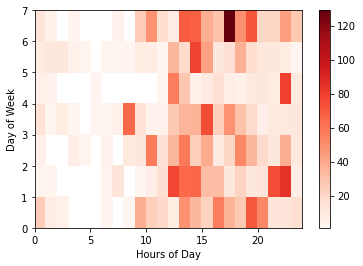

In [19]:
# heatmap data
heatmap_data = heatmap_data.unstack()
#Create Heatmap
plt.pcolor(heatmap_data,cmap='Reds')
plt.xlabel('Hours of Day')
plt.ylabel('Day of Week')
plt.colorbar()
plt.show()